In [51]:
import numpy as np
import pandas as pd
#using sample generators from scikit-learn.
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report,  balanced_accuracy_score
from mlxtend.plotting import plot_decision_regions

from imblearn.over_sampling import SMOTE
from mlxtend.plotting import plot_decision_regions
from imblearn.under_sampling import RandomUnderSampler



In [52]:
X_moons_balanced, y_moons_balanced = make_moons(n_samples=300, noise=0.2, random_state=42)

# Create an imbalanced version of the make_moons dataset by keeping only 30% of class 1
mask = np.random.rand(300) > 0.7  # Keep only 30% of class 1
X_moons_imbalanced = X_moons_balanced[mask | (y_moons_balanced == 0)]
y_moons_imbalanced = y_moons_balanced[mask | (y_moons_balanced == 0)]


#create really imbalanced version of the make_moons dataset by keeping only 10% of class 1
mask = np.random.rand(300) > 0.9  # Keep only 10% of class 1
X_moons_imbalanced_2 = X_moons_balanced[mask | (y_moons_balanced == 0)]
y_moons_imbalanced_2 = y_moons_balanced[mask | (y_moons_balanced == 0)]



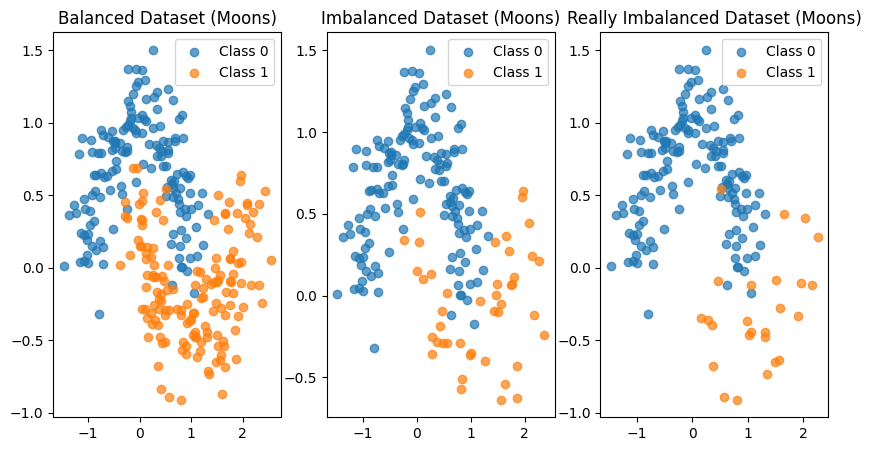

In [53]:
# Plot the datasets
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
# Balanced dataset plot (make_moons)
axes[0].scatter(X_moons_balanced[y_moons_balanced == 0, 0], X_moons_balanced[y_moons_balanced == 0, 1], label="Class 0", alpha=0.7)
axes[0].scatter(X_moons_balanced[y_moons_balanced == 1, 0], X_moons_balanced[y_moons_balanced == 1, 1], label="Class 1", alpha=0.7)
axes[0].set_title("Balanced Dataset (Moons)")
axes[0].legend()

# Imbalanced dataset plot (make_moons)
axes[1].scatter(X_moons_imbalanced[y_moons_imbalanced == 0, 0], X_moons_imbalanced[y_moons_imbalanced == 0, 1], label="Class 0", alpha=0.7)
axes[1].scatter(X_moons_imbalanced[y_moons_imbalanced == 1, 0], X_moons_imbalanced[y_moons_imbalanced == 1, 1], label="Class 1", alpha=0.7)
axes[1].set_title("Imbalanced Dataset (Moons)")
axes[1].legend()


# Really imbalanced dataset plot (make_moons)
axes[2].scatter(X_moons_imbalanced_2[y_moons_imbalanced_2 == 0, 0], X_moons_imbalanced_2[y_moons_imbalanced_2 == 0, 1], label="Class 0", alpha=0.7)
axes[2].scatter(X_moons_imbalanced_2[y_moons_imbalanced_2 == 1, 0], X_moons_imbalanced_2[y_moons_imbalanced_2 == 1, 1], label="Class 1", alpha=0.7)
axes[2].set_title("Really Imbalanced Dataset (Moons)")
axes[2].legend()
plt.show()

I used make_moons dataset and for balanced data I took all instances. for imbalanced, I took 30% of whole dataset. for really imbalanced, I  took 10% of whole dataset.

Balanced Moons Dataset:
Accuracy: 0.9
Balanced Accuracy: 0.8981900452488687
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        52
           1       0.91      0.91      0.91        68

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



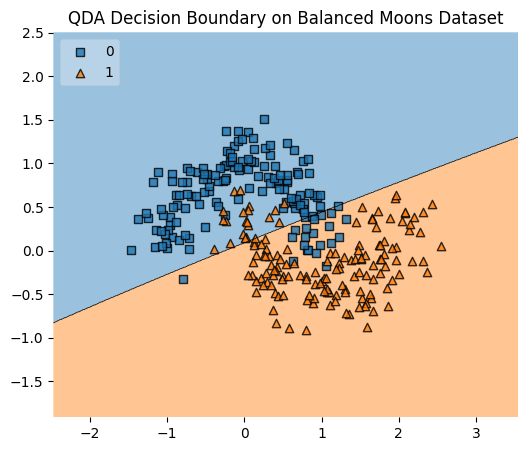

Imbalanced Moons Dataset:
Accuracy: 0.8974358974358975
Balanced Accuracy: 0.9095982142857143
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.65      0.93      0.76        14

    accuracy                           0.90        78
   macro avg       0.82      0.91      0.85        78
weighted avg       0.92      0.90      0.90        78



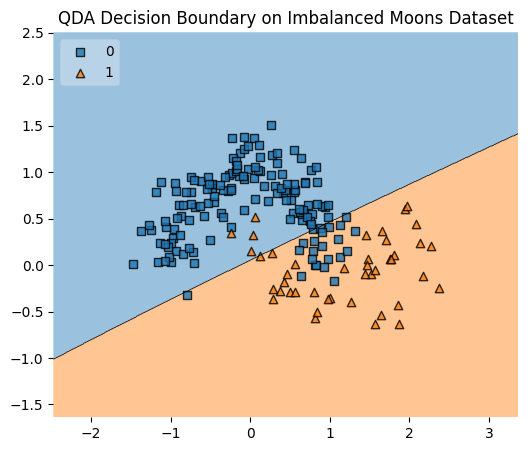

Really Imbalanced Moons Dataset:
Accuracy: 0.9142857142857143
Balanced Accuracy: 0.8971774193548387
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        62
           1       0.58      0.88      0.70         8

    accuracy                           0.91        70
   macro avg       0.78      0.90      0.82        70
weighted avg       0.94      0.91      0.92        70



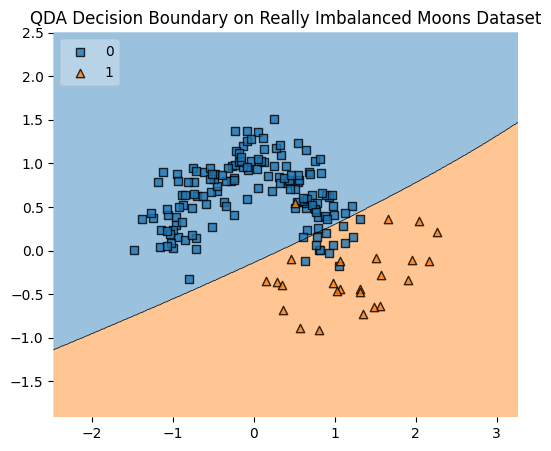

In [54]:
# Split datasets into train and test sets (40% test data)
X_train_moons_balanced, X_test_moons_balanced, y_train_moons_balanced, y_test_moons_balanced = train_test_split(X_moons_balanced, y_moons_balanced, test_size=0.4, random_state=42)
X_train_moons_imbalanced, X_test_moons_imbalanced, y_train_moons_imbalanced, y_test_moons_imbalanced = train_test_split(X_moons_imbalanced, y_moons_imbalanced, test_size=0.4, random_state=42)
X_train_moons_imbalanced_2, X_test_moons_imbalanced_2, y_train_moons_imbalanced_2, y_test_moons_imbalanced_2 = train_test_split(X_moons_imbalanced_2, y_moons_imbalanced_2, test_size=0.4, random_state=42)

# Train a QuadraticDiscriminantAnalysis classifier with balanced priors
qda = QuadraticDiscriminantAnalysis(priors=[0.5, 0.5])

# Function to plot decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    plt.figure(figsize=(6, 5))
    classifier.fit(X, y)
    plot_decision_regions(X, y, clf=classifier, legend=2)
    plt.title(title)
    plt.show()

# Train and evaluate on balanced dataset
qda.fit(X_train_moons_balanced, y_train_moons_balanced)
y_pred_moons = qda.predict(X_test_moons_balanced)
print("Balanced Moons Dataset:")
print("Accuracy:", accuracy_score(y_test_moons_balanced, y_pred_moons))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_moons_balanced, y_pred_moons))
print(classification_report(y_test_moons_balanced, y_pred_moons))
plot_decision_boundary(X_moons_balanced, y_moons_balanced, qda, "QDA Decision Boundary on Balanced Moons Dataset")

# Train and evaluate on imbalanced dataset
qda.fit(X_train_moons_imbalanced, y_train_moons_imbalanced)
y_pred_moons = qda.predict(X_test_moons_imbalanced)
print("Imbalanced Moons Dataset:")
print("Accuracy:", accuracy_score(y_test_moons_imbalanced, y_pred_moons))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_moons_imbalanced, y_pred_moons))
print(classification_report(y_test_moons_imbalanced, y_pred_moons))
plot_decision_boundary(X_moons_imbalanced, y_moons_imbalanced, qda, "QDA Decision Boundary on Imbalanced Moons Dataset")

# Train and evaluate on really imbalanced dataset
qda.fit(X_train_moons_imbalanced_2, y_train_moons_imbalanced_2)
y_pred_moons = qda.predict(X_test_moons_imbalanced_2)
print("Really Imbalanced Moons Dataset:")
print("Accuracy:", accuracy_score(y_test_moons_imbalanced_2, y_pred_moons))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_moons_imbalanced_2, y_pred_moons))
print(classification_report(y_test_moons_imbalanced_2, y_pred_moons))
plot_decision_boundary(X_moons_imbalanced_2, y_moons_imbalanced_2, qda, "QDA Decision Boundary on Really Imbalanced Moons Dataset")


I chose QuadraticDiscriminantAnalysis because QDA can model non linear decision boundaries and it is a good classifier for binary classification problems. It is also a good classifier for small datasets. QDA allows each class to have its own covariance matrix. This flexibility can lead to better performance when the assumption of equal covariance matrices (as in Linear Discriminant Analysis, LDA) does not hold.

Oversampled Imbalanced Moons Dataset:
Accuracy: 0.9102564102564102
Balanced Accuracy: 0.9174107142857143
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        64
           1       0.68      0.93      0.79        14

    accuracy                           0.91        78
   macro avg       0.83      0.92      0.87        78
weighted avg       0.93      0.91      0.92        78



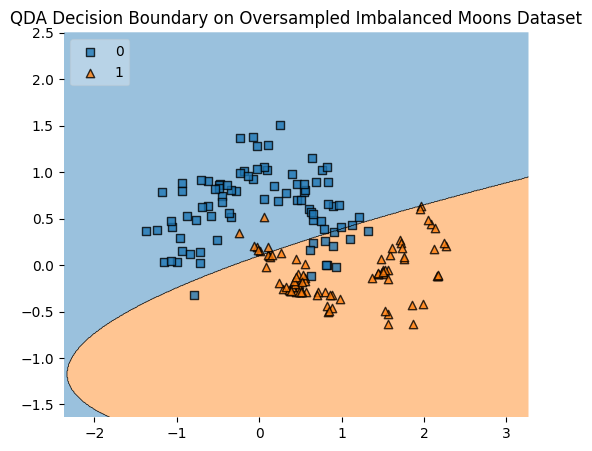

In [55]:
# Apply SMOTE oversampling to balance the imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_moons_imbalanced_resampled, y_train_moons_imbalanced_resampled = smote.fit_resample(X_train_moons_imbalanced, y_train_moons_imbalanced)


# Train and evaluate on oversampled imbalanced dataset
qda.fit(X_train_moons_imbalanced_resampled, y_train_moons_imbalanced_resampled)
y_pred_moons_imbalanced_resampled = qda.predict(X_test_moons_imbalanced)
print("Oversampled Imbalanced Moons Dataset:")
print("Accuracy:", accuracy_score(y_test_moons_imbalanced, y_pred_moons_imbalanced_resampled))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_moons_imbalanced, y_pred_moons_imbalanced_resampled))
print(classification_report(y_test_moons_imbalanced, y_pred_moons_imbalanced_resampled))
plot_decision_boundary(X_train_moons_imbalanced_resampled, y_train_moons_imbalanced_resampled, qda, "QDA Decision Boundary on Oversampled Imbalanced Moons Dataset")

I used SMOTE technique to balance dataset. It does help to improve the performance of the model. 

Undersampled Imbalanced Moons Dataset:
Accuracy: 0.8974358974358975
Balanced Accuracy: 0.9095982142857143
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.65      0.93      0.76        14

    accuracy                           0.90        78
   macro avg       0.82      0.91      0.85        78
weighted avg       0.92      0.90      0.90        78



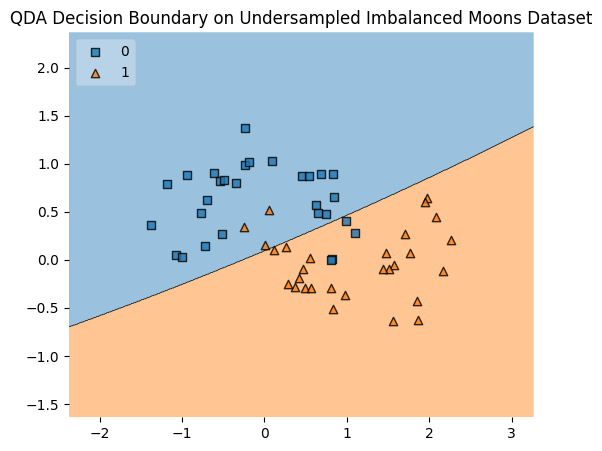

In [56]:
# Apply undersampling to balance the imbalanced dataset
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_moons_imbalanced_undersampled, y_train_moons_imbalanced_undersampled = undersample.fit_resample(X_train_moons_imbalanced, y_train_moons_imbalanced)


# Train and evaluate on undersampled imbalanced dataset
qda.fit(X_train_moons_imbalanced_undersampled, y_train_moons_imbalanced_undersampled)
y_pred_moons_imbalanced_undersampled = qda.predict(X_test_moons_imbalanced)
print("Undersampled Imbalanced Moons Dataset:")
print("Accuracy:", accuracy_score(y_test_moons_imbalanced, y_pred_moons_imbalanced_undersampled))
print("Balanced Accuracy:", balanced_accuracy_score(y_test_moons_imbalanced, y_pred_moons_imbalanced_undersampled))
print(classification_report(y_test_moons_imbalanced, y_pred_moons_imbalanced_undersampled))
plot_decision_boundary(X_train_moons_imbalanced_undersampled, y_train_moons_imbalanced_undersampled, qda, "QDA Decision Boundary on Undersampled Imbalanced Moons Dataset")

I used RandomUnderSampler to balance dataset. It does help to improve the performance of the model.
overall balanced_accuracy slightly improved 